In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('metadata.csv', index_col=0)
df

cellnames cellids grouping  time_continuous  time_discrete
C1           C1      C1       M3         0.636245              3
C10          C2     C10       M5         1.265308              6
C100         C3    C100       M6         1.805293              9
C1000        C4   C1000       M5         1.430909              7
C1001        C5   C1001       M7         0.661883              4
...         ...     ...      ...              ...            ...
C995      C2084    C995       M7         0.696439              4
C996      C2085    C996       M3         0.262269              2
C997      C2086    C997       M5         1.580378              8
C998      C2087    C998       M5         1.300584              6
C999      C2088    C999       M3         0.478184              3

[2062 rows x 5 columns]

In [3]:
# c = df['U']
g = df['grouping'].tolist()
set(g)

{'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8'}

In [4]:
types = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']#, 'M9', 'M10']
# types = list(set(g))
types

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']

In [5]:
cellnames = df['cellnames'].tolist()
cellids = df['cellids'].tolist()

In [6]:
labels = [types.index(g[cellids.index(name)])+1 for name in cellnames]

In [7]:
pd.DataFrame(labels).to_csv('labels.csv', header=False, index=False)

In [8]:
data_df = pd.read_csv('data.csv', header='infer', index_col=0)
data_df

G1        G2        G3        G4        G5        G6        G7  \
C1     4.915756  0.000000  0.000000  5.591287  0.000000  0.000000  0.000000   
C2     6.491003  0.000000  0.000000  0.000000  0.000000  4.552796  0.000000   
C3     4.255011  0.000000  0.000000  0.000000  5.382335  0.000000  0.000000   
C4     5.450311  0.000000  0.000000  0.000000  6.375519  0.000000  0.000000   
C5     0.000000  0.000000  0.000000  1.518946  0.000000  3.813597  3.081214   
...         ...       ...       ...       ...       ...       ...       ...   
C2084  5.857436  0.000000  6.202556  0.000000  0.000000  0.000000  0.000000   
C2085  5.460402  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C2086  0.000000  0.000000  5.662134  4.532689  4.752975  4.090577  0.000000   
C2087  0.000000  4.826489  5.303578  4.428301  0.000000  0.000000  5.271986   
C2088  0.000000  5.080561  5.362295  5.156318  0.000000  0.000000  0.000000   

             G8        G9  G10  ...      G492      G493      G494      G495  \
C1     0.000000  6.157592  0.0  ...  0.000000  0.000000  5.641767  0.000000   
C2     0.000000  4.815177  0.0  ...  0.000000  5.661722  0.000000  0.000000   
C3     6.515188  0.000000  0.0  ...  0.000000  5.382335  0.000000  0.000000   
C4     7.140886  0.000000  0.0  ...  0.000000  0.000000  3.254676  0.000000   
C5     6.440080  4.427872  0.0  ...  0.000000  0.000000  0.000000  0.000000   
...         ...       ...  ...  ...       ...       ...       ...       ...   
C2084  0.000000  5.450669  0.0  ...  5.647994  5.222014  0.000000  0.000000   
C2085  5.353362  0.000000  0.0  ...  3.972053  5.112037  0.000000  0.000000   
C2086  5.640212  5.374123  0.0  ...  5.263750  5.845751  0.000000  0.000000   
C2087  4.910958  0.000000  0.0  ...  0.000000  0.000000  0.000000  4.108793   
C2088  0.000000  5.570467  0.0  ...  5.570467  4.826029  6.360754  4.871693   

           G496      G497      G498      G499      G500      G501  
C1     0.000000  2.809138  0.000000  5.512092  0.000000  0.000000  
C2     5.714125  0.000000  0.000000  0.000000  4.432842  4.494065  
C3     0.000000  0.000000  0.000000  0.000000  4.755391  0.000000  
C4     6.251567  0.000000  0.000000  0.000000  0.000000  2.143334  
C5     0.000000  0.000000  0.000000  0.000000  6.343942  0.000000  
...         ...       ...       ...       ...       ...       ...  
C2084  0.000000  4.059093  0.000000  4.286724  0.000000  5.892453  
C2085  0.000000  0.000000  0.000000  0.000000  5.112037  0.000000  
C2086  4.668852  0.000000  0.000000  5.725972  0.000000  0.000000  
C2087  3.599391  0.000000  4.538615  5.138212  1.438753  0.000000  
C2088  0.000000  0.000000  0.000000  5.393937  0.000000  0.000000  

[2062 rows x 501 columns]

In [9]:
data = np.array(data_df)

In [10]:
from sklearn.decomposition import PCA
data = PCA(n_components=30).fit_transform(data)

In [11]:
data.shape

(2062, 30)

In [12]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(data)

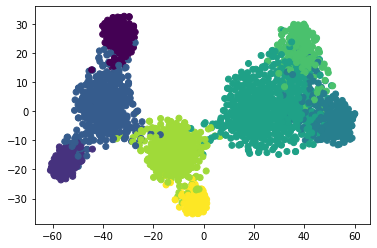

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)